In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import tifffile
import pre_process_mm as pre
import mm3_adapted_cell_segmentation as mm3seg
import mm3_adapted_cell_tracking as mm3track
import plot_cells
import HF

This pipeline has different ways it can be used. If you are running this for the first time
on a set of images it can be straight forward. However some parts may need to be modified when troubleshooting depending on which
step you want to trouble shoot. Adjustments will come in the form of just finding the correct path 
of the set of images you want to troubleshoot with 

In [ ]:
# use this code block for when working with one timelapse. This code block will ask the user to 
# select the directory of the experiment you want to analyze. Select the folder that holds the 
#folders of each position that will be analyzed
folder_name = 'DUMM_giTG66_Glucose_012325'
root_dir = HF.select_directory()
drift_corrected_path = root_dir + '/hyperstacked/drift_corrected'

In [ ]:
# generate a list of the positions you want to analyze. If you want to analyze all positions in a 
# experiment then leave list blanks 
pos_list = ['/Pos0', '/Pos1']
if pos_list:
    pos_list_paths = [root_dir + pos for pos in pos_list]


THe following code block runs the initial preprocessing of images by changing captured images 
to a format that the pipeline will use and applies drift correction. 

The IDE you're using will prompt you whether or not you want to save ouput files into a specified directory or if you decline it will save outputs into the same folder you selected previously. 

If you decide to save into a specified directory the code will open a window (often this window will open behind all your windows) prompting the user to select an output directory, then again to select the directory with the experiment name you want to save (there's probably a better way to do this that omits the second select_directory but not worth the time to adjust it right now 05/25/2025)

In [ ]:
#once this is run once don't need to run again
drift_corrected_path = pre.drift_correct(root_dir, 'DuMM', pos_list_paths, c=0)


In [ ]:
#for troubleshooting
drift_corrected_path = "/Volumes/mcovert/Instruments/Covert-lab-scope1/scope1dataQ_2/Adrian/data/DUMM_giTG66_Glucose_012325/renamed/hyperstacked/drift_corrected"
print(drift_corrected_path)

In [ ]:
#this code takes the drift corrected images and rotates the images to align them for easy detection
# of mm channels. FYI you may need to change 'closed ends' depending on the orientation of your images
path_to_rotated_images = pre.rotate_stack(drift_corrected_path, c=0, growth_channel_length=400, closed_ends = 'down')

In [2]:
#for troubleshooting after roating images 
path_to_rotated_images = "/Volumes/mcovert/Instruments/Covert-lab-scope1/scope1dataQ_2/Adrian/data/DUMM_giTG66_Glucose_012325/renamed/hyperstacked/drift_corrected/rotated"

channels identified in FOV 000
saving sliced microfluidic channels as tcyx stacks


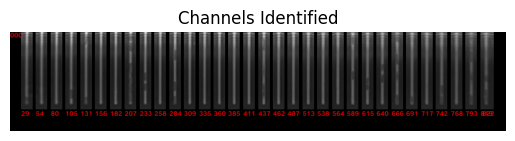

In [3]:
path_to_mm_channels = pre.extract_mm_channels(path_to_rotated_images)

In [ ]:
# will need to code something that can find channels with cells and change the related CSV, or
# manually annotate then develope code to just read the CSV's with channel information 


Once ana_peaks and blank_peaks are identified subtract the background from phase and 
fluorescent images 